In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import OpinionModel
import networkx as nx

SEED = 77
np.random.seed(SEED)

In [9]:
nodes_number = 1000

x0 = np.random.uniform(low=-1.0, high=1.0, size=nodes_number)

H = nx.scale_free_graph(nodes_number, alpha=0.3, beta=0.1, gamma=0.6)
G = H.to_undirected()

# plt.hist(x0); plt.show()
# nx.draw(G, node_size=100, node_color='k', width=0.1); plt.show()

In [14]:
om = OpinionModel(G=G)

res = om.model(alpha=0.8, T=500, x0=x0)

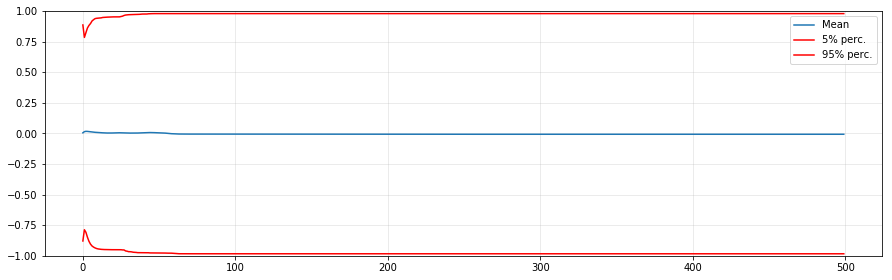

In [15]:
om.plot_results(res)

C:\Users\annam\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


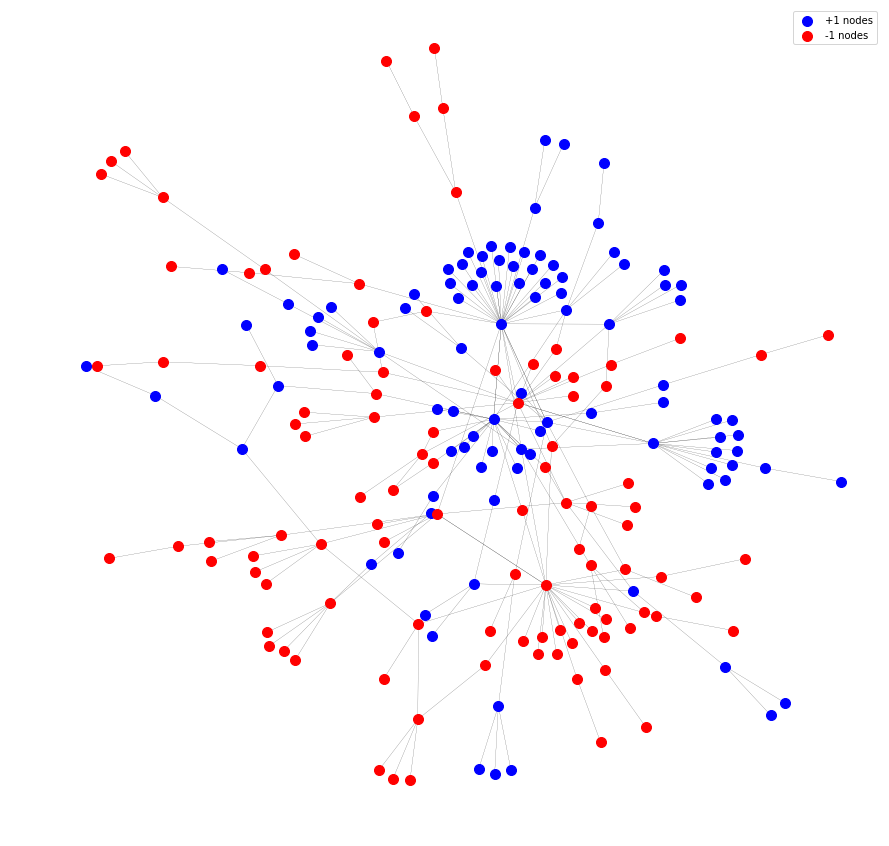

In [5]:
time_moment = -1  # posledni chvile
om.plot_graph(x=res[time_moment, :, 0])

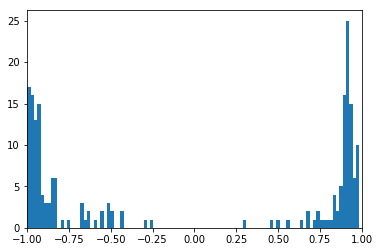

In [6]:
plt.hist(res[time_moment, :, 0], 100); plt.xlim((-1, 1));

In [2]:
nodes_number = 1000
H = nx.scale_free_graph(nodes_number, alpha=0.3, beta=0.1, gamma=0.6)
G = H.to_undirected()

results = np.zeros(shape=[50, 50])  # ruzne x0, ruzne alphy
variance = np.zeros(shape=[50, 50])  # ruzne x0, ruzne alphy

om = OpinionModel(G=G)

alphas = np.linspace(0, 1, results.shape[1])
for i, _ in enumerate(range(results.shape[0])):
    x0 = np.random.uniform(low=-1.0, high= 1.0, size=nodes_number)

    for j, a in enumerate(alphas):
        res = om.model(alpha=a, T=500, x0=x0)
        results[i, j] = res[-1, :, 0].mean()
        variance[i, j] = res[-1, :, 0].std()
        
#np.savetxt("resultsSF.txt", results)
#np.savetxt("varianceSF.txt", variance)

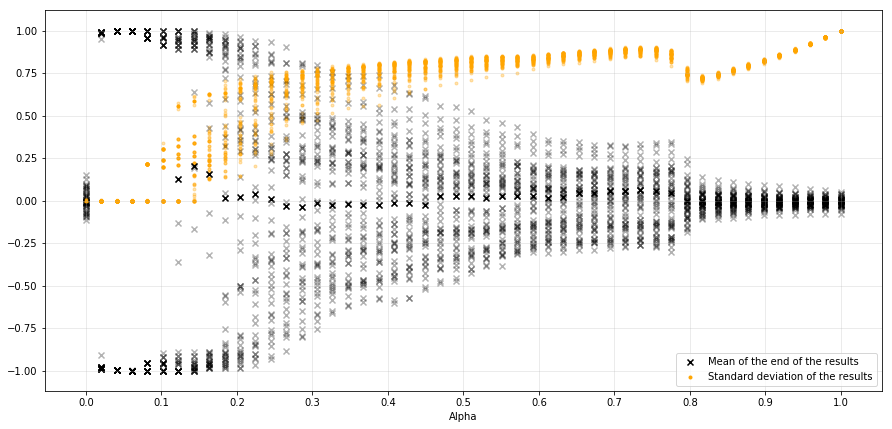

In [3]:
plt.figure(figsize=(15, 7))
for i in range(results.shape[0]):
    plt.scatter(alphas, results[i, :], color='k', alpha=0.3, marker='x')
    plt.scatter(alphas, variance[i,:], marker=".", alpha=0.3, c="orange")

#, label='Standard deviation of the results'
#label='Standard deviation of the results'
plt.scatter(alphas, results[0, :], color='k', alpha=1.0, marker='x', label ='Mean of the end of the results')
plt.scatter(alphas, variance[0,:], marker=".", alpha=1.0, c='orange', label='Standard deviation of the results')

plt.xlabel('Alpha')
#plt.ylabel('Mean of the end of the result')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(alpha=0.3)

plt.savefig("SF+v.png", dpi=500)
plt.show()